In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential, Model
import random


import cv2
from PIL import Image


sns.set(style='white', context='notebook', palette='deep')

In [4]:
IMG_WIDTH=200
IMG_HEIGHT=200
mask_folder=r'C:\Users\rkroc\Desktop\FDL_kaggle\train_masks\train_masks'
img_folder = r'C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images'

C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images\8389.jpg
C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images\7290.jpg
C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images\6422.jpg
C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images\9725.jpg
C:\Users\rkroc\Desktop\FDL_kaggle\train_images\train_images\7294.jpg


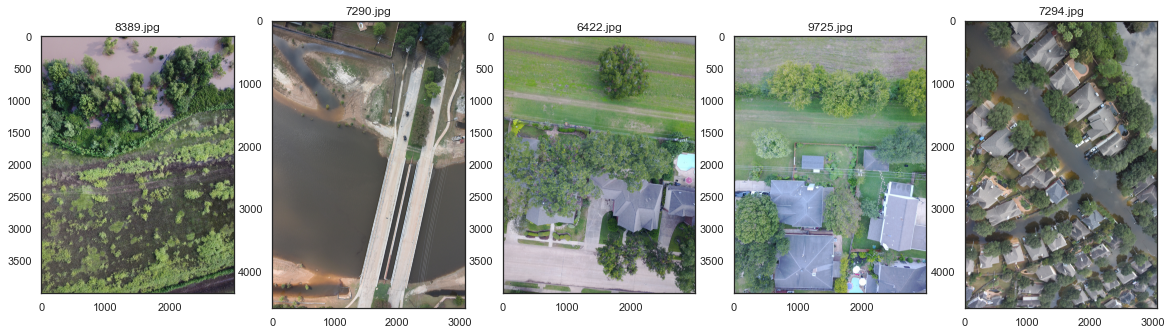

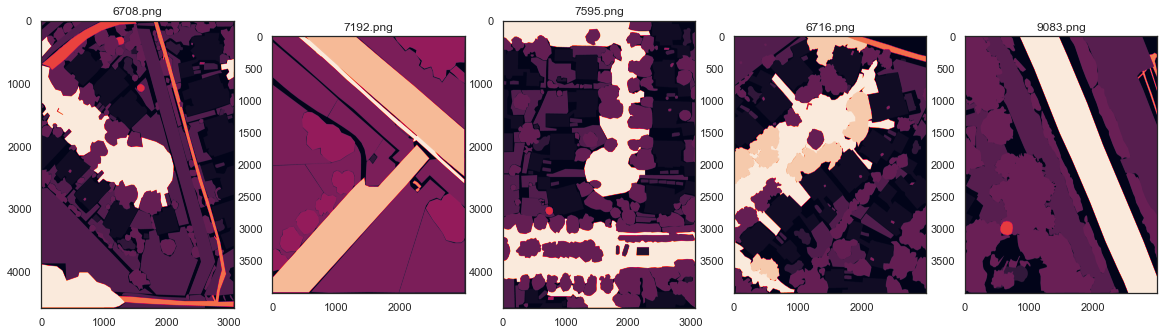

In [6]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(img_folder)) 
    image_path= os.path.join(img_folder, file)
    print(image_path)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(mask_folder)) 
    image_path= os.path.join(mask_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


In [42]:
# import os

# from PIL import Image
# import numpy as np

# def rle_encode(img):
#     '''
#     img: numpy array, 1 - mask, 0 - background
#     Returns run length as string formated
#     '''
#     pixels = img.flatten()
#     pixels = np.concatenate([[0], pixels, [0]])
#     runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
#     runs[1::2] -= runs[::2]
#     return ' '.join(str(x) for x in runs)

# def rle_decode(mask_rle, shape):
#     '''
#     mask_rle: run-length as string formated (start length)
#     shape: (height,width) of array to return
#     Returns numpy array, 1 - mask, 0 - background
#     '''
#     s = mask_rle.split()
#     starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
#     starts -= 1
#     ends = starts + lengths
#     img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
#     for lo, hi in zip(starts, ends):
#         img[lo:hi] = 1
#     return img.reshape(shape)
# def create_rles():
#     """Used for Kaggle submission: predicts and encode all test images"""
#     dir = 'C:/Users/rkroc/Desktop/FDL_kaggle/train_masks/train_masks/'
#     N = len(list(os.listdir(dir)))
#     with open('submission_file.csv', 'w') as f:
#         f.write('ImageClassId,rle_mask\n')
#         for index, i in enumerate(os.listdir(dir)):
#             # print('{}/{}'.format(index, N))

#             mask = Image.open(dir + i)
#             mask = mask.resize((1024, 1024), resample=Image.NEAREST)
#             mask = np.array(mask)

#             for x in range(1, 25):
#                 enc = rle_encode(mask == x)
#                 f.write(f"{i.split('_')[0]}_{x},{enc}\n")

# create_rles()


In [84]:
# dir = 'C:/Users/rkroc/Desktop/FDL_kaggle/train_masks/train_masks/'
# N = len(list((os.listdir(dir))))
# print(N)
# plt.figure(figsize=(20,20))
# for index, i in enumerate(os.listdir(dir)):
#     print('{}/{}'.format(index, N))
#     if index==2:
#         break
#     mask = Image.open(dir + i)
# #     plt.imshow(mask)
# #     ax=plt.subplot(1,10,index+1)
#     mask = mask.resize((1024, 1024), resample=Image.NEAREST)
#     mask = np.array(mask)
# #     print(mask)
# #     print(len(mask==0))
# #     print(len(mask==1))
#     img = (mask==1)
#     pixels = img.flatten()
#     print(pixels)
#     pixels = np.concatenate([[0], pixels, [0]])
#     print(pixels)
#     runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
#     print(len(runs))
#     runs[1::2] -= runs[::2]
# x = "1232637829472934629126392"
# print(x[1::2])
# print(x[::2])
# t1=int(x[1::2])
# t2 =int(x[::2])
# t1-=t2
# print(t1)


In [89]:
l = []
for index, i in enumerate(os.listdir(mask_folder)):
    print(index,i)
    image_path= os.path.join(mask_folder, i)
    #print(image_path)
    mask = plt.imread(image_path)
    #mask  = Image.open(image_path) #using PIL
    x = np.array(mask)
    l.append((x.shape))
#     plt.imshow(mask)


0 10172.png
1 10174.png
2 10300.png
3 10810.png
4 10814.png
5 10817.png
6 6411.png
7 6412.png
8 6414.png
9 6416.png
10 6419.png
11 6420.png
12 6421.png
13 6422.png
14 6426.png
15 6431.png
16 6433.png
17 6435.png
18 6437.png
19 6443.png
20 6444.png
21 6445.png
22 6447.png
23 6449.png
24 6452.png
25 6454.png
26 6456.png
27 6467.png
28 6468.png
29 6469.png
30 6496.png
31 6545.png
32 6548.png
33 6555.png
34 6556.png
35 6559.png
36 6564.png
37 6565.png
38 6567.png
39 6580.png
40 6594.png
41 6603.png
42 6619.png
43 6622.png
44 6625.png
45 6627.png
46 6639.png
47 6640.png
48 6643.png
49 6645.png
50 6649.png
51 6652.png
52 6659.png
53 6664.png
54 6666.png
55 6691.png
56 6692.png
57 6693.png
58 6695.png
59 6703.png
60 6704.png
61 6706.png
62 6707.png
63 6708.png
64 6712.png
65 6714.png
66 6715.png
67 6716.png
68 6794.png
69 6796.png
70 6799.png
71 6802.png
72 6807.png
73 6814.png
74 6820.png
75 6824.png
76 6827.png
77 6829.png
78 6836.png
79 6843.png
80 6844.png
81 6846.png
82 6853.png
83 6855.

In [90]:
set(l)

{(4000, 3000), (4592, 3072)}

In [83]:
# Getting an Image from the array
# data = np.ones( (512,512,3), dtype=np.uint8)
# data[:,:200,0] = 255
# data[:,200:,1] = 127
# data[:,:,2] = 255
# plt.imshow(data, interpolation='nearest')
# plt.show()

In [91]:
#Unsupervised


(4000, 3000, 3)

In [99]:
from skimage.color import rgb2hsv
im_path = os.path.join(img_folder,'10810.jpg')
img = Image.open(im_path)
img2 = img.resize((416,256))
x = np.array(img2)
z = np.dstack((x,rgb2hsv(x)))
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(106496, 6)

In [100]:
kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)

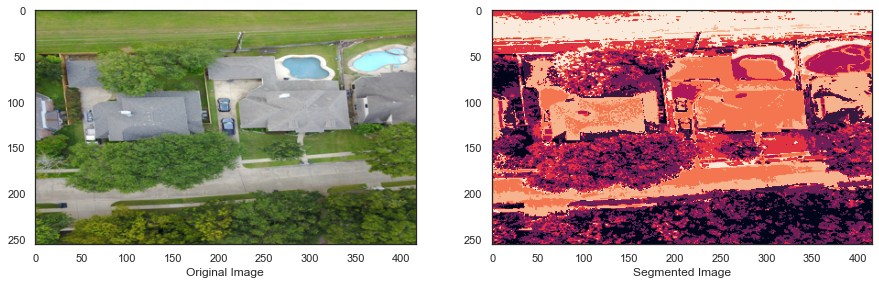

In [101]:
pic = labels.reshape(256,416)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

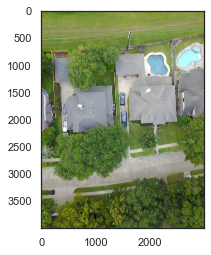

In [103]:
from skimage.color import rgb2hsv
im_path = os.path.join(img_folder,'10810.jpg')
img = Image.open(im_path)
plt.imshow(img)

In [1]:
# Wanci code to get data
# os.listdir() 
# os.path.join(x1,x2,x3,x4,x3,...) ,joins two file path
# assert os.path.isfile(path)

In [ ]:
original image array are in float and uint
kaggle nb has both float
trained model by me
initial float and uint, then converted to tensor both float, then for one hot converted y to int64
so final data float 32 and int64 but loss fn requires y float so inside converted to float and then compute loss
output is float (pytorch inbuilt)

In [35]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from utils import *

# Convert a PIL Image to tensor.
transform = transforms.Compose([transforms.ToTensor()])


class MyDataset(Dataset):
    def __init__(self, path):
        self.path = path
        self.name = os.listdir(os.path.join(path, 'train_masks'))

    def __len__(self):
        return len(self.name)

    def __getitem__(self, index):
        msk_name = self.name[index]
        msk_path = os.path.join(self.path, 'train_masks', msk_name)
        img_path = os.path.join(self.path, 'train_images', msk_name.replace('png', 'jpg'))
        img = Image.open(img_path)
        mask = Image.open(msk_path)
        img = img.resize((512,512))
        mask = mask.resize((512,512))
        img = transform(img)
        mask = np.array(mask)
        mask = torch.from_numpy(mask)
        
        return img,mask


if __name__ == '__main__':
    data = MyDataset('')
    X = data[0][0]
    y = data[0][1]
    print(X.shape,y.shape)
    print(X.dtype,y.dtype)



torch.Size([3, 512, 512]) torch.Size([512, 512])
torch.float32 torch.uint8


In [36]:
y

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [4, 6, 6,  ..., 0, 0, 0],
        [4, 6, 6,  ..., 0, 0, 0],
        [2, 3, 3,  ..., 0, 0, 0]], dtype=torch.uint8)

In [38]:
# from torch.nn.functional import one_hot only applicable for int64 not float
y = one_hot(y.to(torch.int64)) int64 requires for onehot encoding
y.dtype

torch.int64

In [15]:
class TestDataset(Dataset):
    def __init__(self, path):
        self.path = path
        self.name = os.listdir(os.path.join(path, 'test_images'))

    def __len__(self):
        return len(self.name)

    def __getitem__(self, index):
        img_name = self.name[index]
        img_path = os.path.join(self.path, 'test_images',img_name)
        assert os.path.isfile(img_path)
        img = Image.open(img_path)
        img = img.resize((512,512))
        img = transform(img)
        
        return img

if __name__ == '__main__':
    data = MyDataset('')
    X = data[0][0]
    print(X.shape)

torch.Size([3, 512, 512])


torch.int32

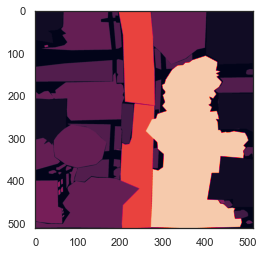

In [23]:
plt.imshow(y)
y.dtype

In [20]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
show(y)

ValueError: axes don't match array

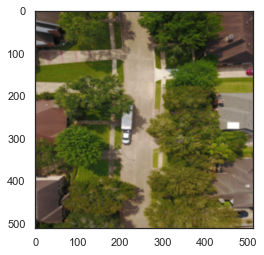

In [18]:
plt.imshow(transforms.ToPILImage()(X), interpolation="bicubic")

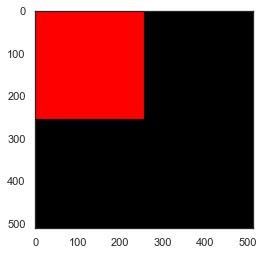

In [13]:
from PIL import Image
import numpy as np

w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
# img.save('my.png')
plt.imshow(img)